In [1]:
#importing the data file
import pandas as pd
df=pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
##we can observe name,genre,type,episodes as object data type
##anime_id and members are the numerical columns...


In [3]:
#we can observe there are missing values in the columns genre and type are the categorical columns and are having the missing values..

In [ ]:
#Handle missing values, if any.

In [4]:
df["genre"].mode()

0    Hentai
Name: genre, dtype: object

In [6]:
df["type"].mode()

0    TV
Name: type, dtype: object

In [ ]:
#replacing the categorical columns with modes...


In [7]:
#Handle missing values
df['genre'].fillna("Hentai",inplace=True)
df['type'].fillna("TV",inplace=True)

In [8]:
df["genre"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Name: genre, Length: 12294, dtype: bool

In [9]:
df["type"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Name: type, Length: 12294, dtype: bool

In [10]:
#replacing the median values for the numerical columns...
df['rating'].fillna(df['rating'].median(), inplace=True)
df['members'].fillna(df['members'].median(), inplace=True)


In [11]:
df["rating"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Name: rating, Length: 12294, dtype: bool

In [12]:
df["members"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Name: members, Length: 12294, dtype: bool

In [13]:
#Explore the dataset to understand its structure and attributes.

##PERFORMING EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [16]:
cols=df.select_dtypes(include='number')
cols

,anime_id,rating,members
0,32281,9.37,200630
1,5114,9.26,793665
2,28977,9.25,114262
3,9253,9.17,673572
4,9969,9.16,151266
...,...,...,...
12289,9316,4.15,211
12290,5543,4.28,183
12291,5621,4.88,219
12292,6133,4.98,175


In [19]:
##STEP 2 BOXPLOTS
#step 2 a. performing Box plot on rating column and observing outliers and inter quartile ranges
df.boxplot(column='rating',vert=False)

import numpy as np
q1 = np.percentile(df["rating"],25)
print("25th percentile",q1)
q3 = np.percentile(df["rating"],75)
print("75th percentile",q3)

iqr = q3-q1
print("Inter quartile range:",iqr)
UW = q3 + (1.5*iqr)

print("Upper whisker length:",UW)
print("number of outliers greater than upper whisker:",len(df["rating"][df["rating"] > UW]))



25th percentile 5.9
75th percentile 7.17
Inter quartile range: 1.2699999999999996
Upper whisker length: 9.075
number of outliers greater than upper whisker: 15


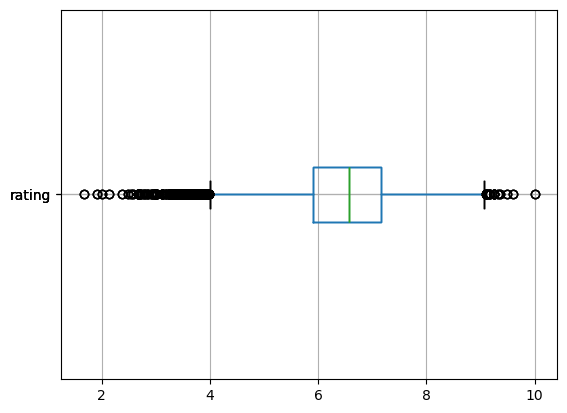

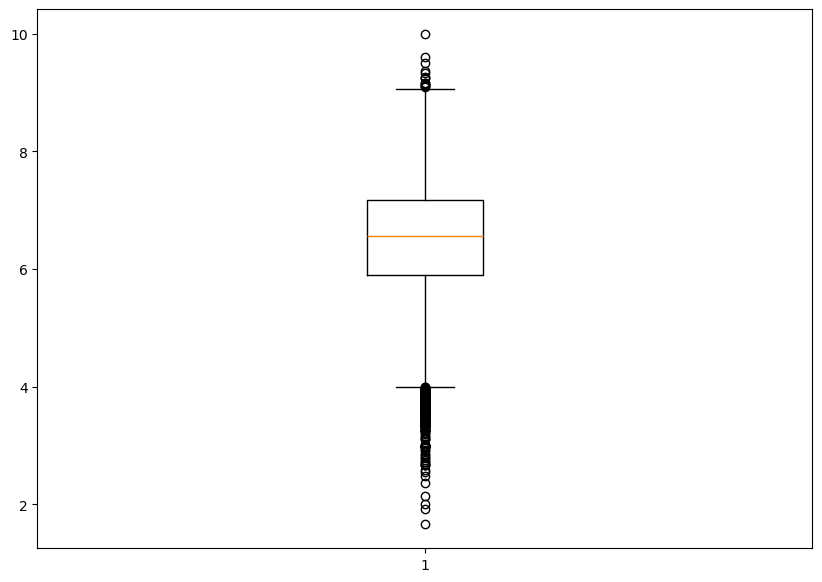

In [23]:

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(10, 7))

data=df["rating"]
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()


In [24]:
##STEP 2 BOXPLOTS
#step 2 b. performing Box plot on members column and observing outliers and inter quartile ranges
df.boxplot(column='members',vert=False)

import numpy as np
q1 = np.percentile(df["members"],25)
print("25th percentile",q1)
q3 = np.percentile(df["members"],75)
print("75th percentile",q3)

iqr = q3-q1
print("Inter quartile range:",iqr)
UW = q3 + (1.5*iqr)

print("Upper whisker length:",UW)
print("number of outliers greater than upper whisker:",len(df["members"][df["members"] > UW]))



25th percentile 225.0
75th percentile 9437.0
Inter quartile range: 9212.0
Upper whisker length: 23255.0
number of outliers greater than upper whisker: 1900


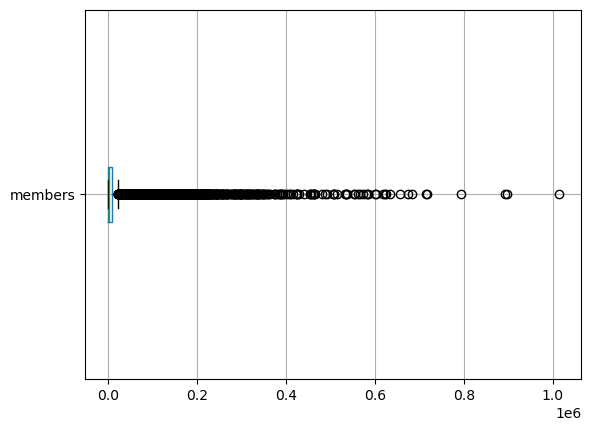

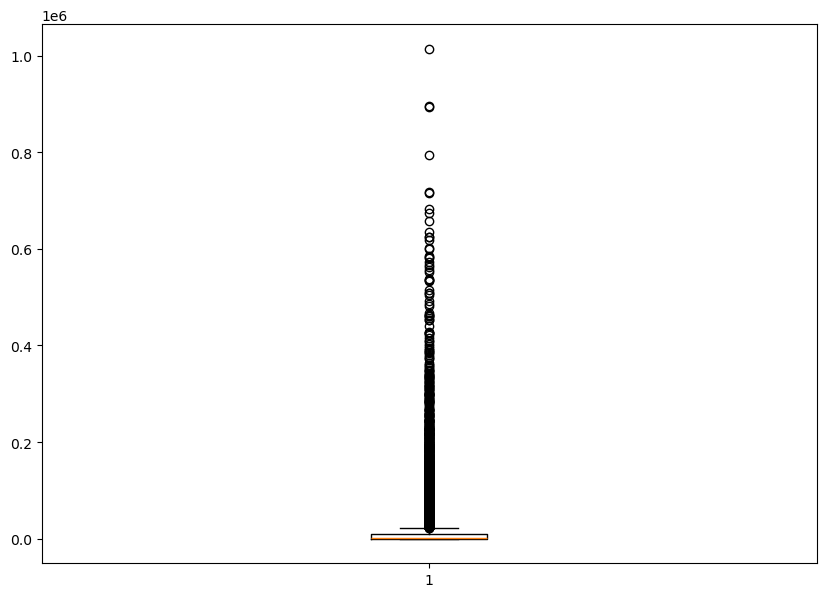

In [25]:

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(10, 7))

data=df["members"]
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()


In [26]:
#HISTOGRAM
df.hist("rating")

print("Skewness of the rating column:",df['rating'].skew())
print("Kurtosis of the rating column ",df['rating'].kurt())

Skewness of the rating column: -0.5538785398052893
Kurtosis of the rating column  0.5771293070524695


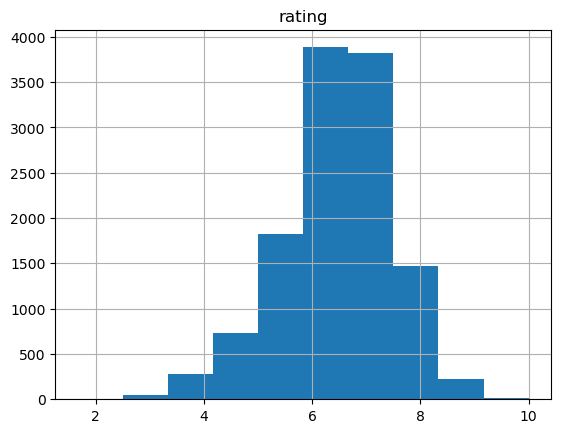

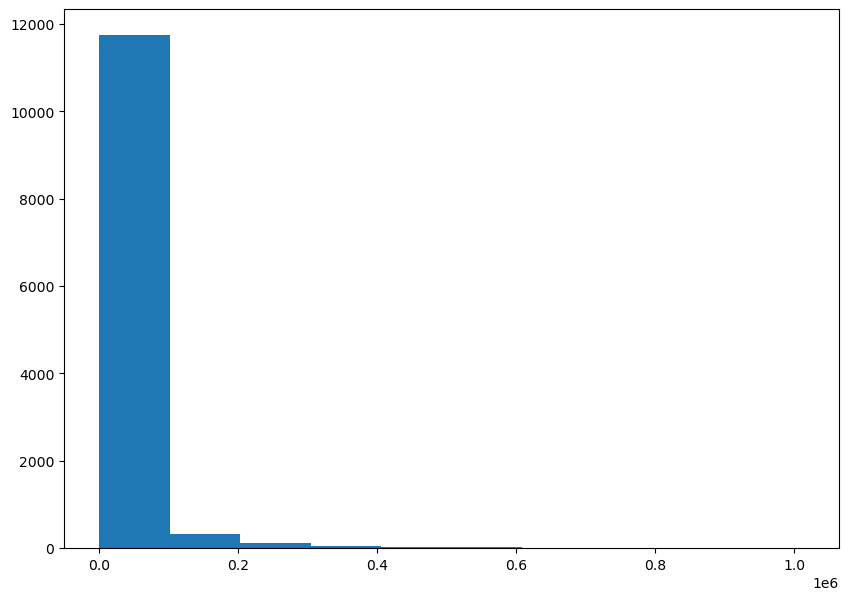

In [27]:

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(10, 7))

data=df["members"]
# Creating plot
plt.hist(data)
 
# show plot
plt.show()


In [28]:
#HISTOGRAM
df.hist("members")

print("Skewness of the members column:",df['members'].skew())
print("Kurtosis of the members column ",df['members'].kurt())

Skewness of the members column: 6.682934321803793
Kurtosis of the members column  62.85609656284951


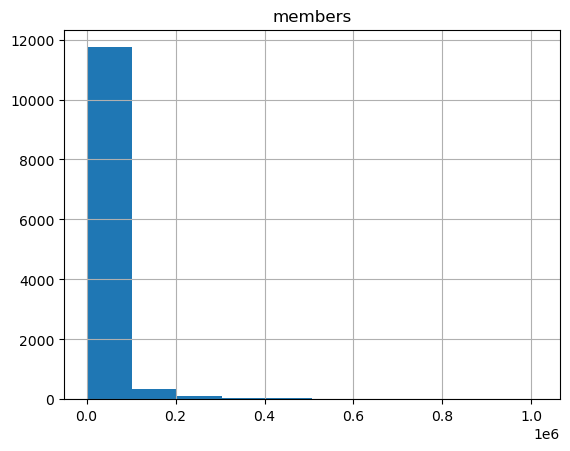

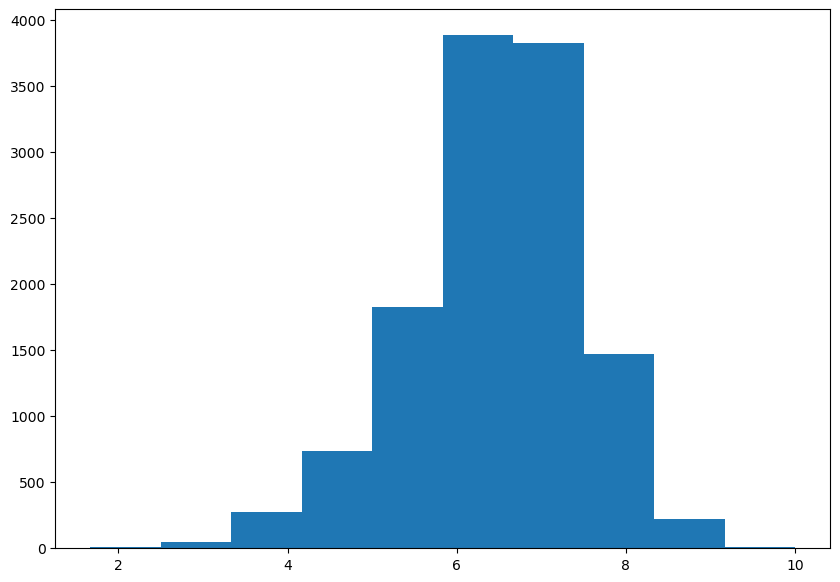

In [29]:

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize =(10, 7))

data=df["rating"]
# Creating plot
plt.hist(data)
 
# show plot
plt.show()


In [30]:
df.corr()

C:\Users\Hima Chandana\AppData\Local\Temp\ipykernel_1032\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,anime_id,rating,members
anime_id,1.000000,-0.274266,-0.080071
rating,-0.274266,1.000000,0.387140
members,-0.080071,0.387140,1.000000


C:\Users\Hima Chandana\AppData\Local\Temp\ipykernel_1032\3836933890.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1['rating'], shade=True)


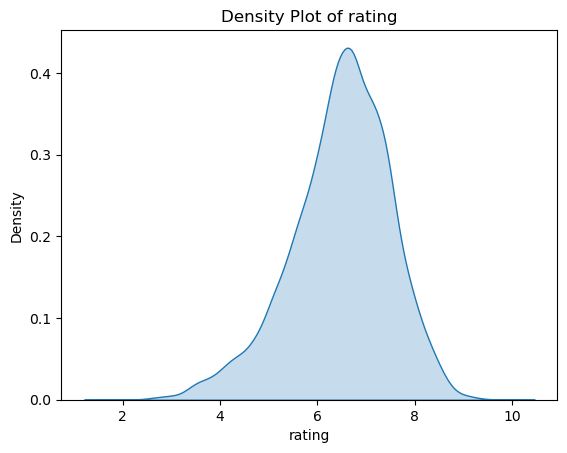

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 
# Identify continuous features 

data1=pd.read_csv("anime.csv")
# Plotting density plot
sns.kdeplot(data1['rating'], shade=True)
plt.title('Density Plot of rating')
plt.xlabel('rating')
plt.ylabel('Density')
plt.show()


C:\Users\Hima Chandana\AppData\Local\Temp\ipykernel_1032\2466908888.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1['members'], shade=True)


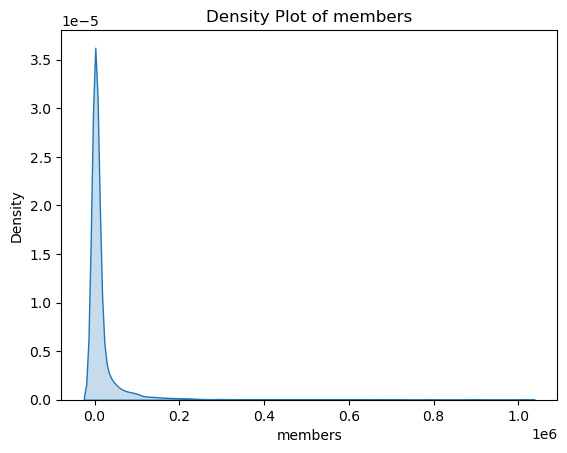

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 
# Identify continuous features 

data1=pd.read_csv("anime.csv")
# Plotting density plot
sns.kdeplot(data1['members'], shade=True)
plt.title('Density Plot of members')
plt.xlabel('members')
plt.ylabel('Density')
plt.show()


C:\Users\Hima Chandana\AppData\Local\Temp\ipykernel_1032\4229638733.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


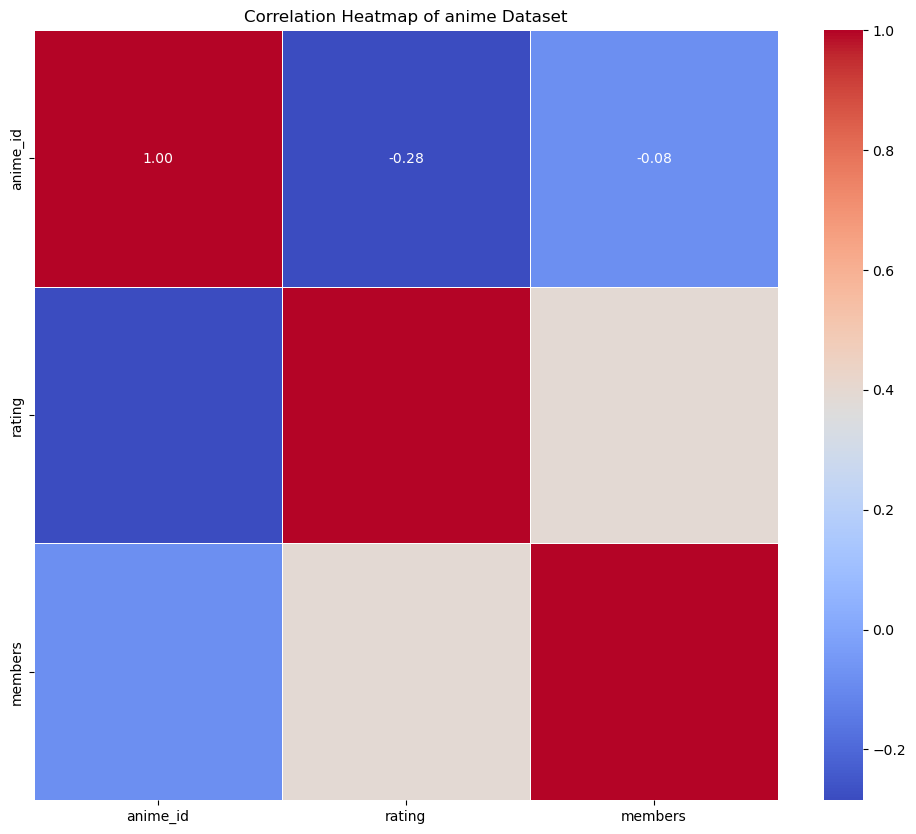

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("anime.csv")

# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels for better understanding
plt.title('Correlation Heatmap of anime Dataset')
plt.show()


In [35]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [36]:
len(df["anime_id"])

12294

In [37]:
df["genre"].value_counts()

Hentai                                                  885
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: genre, Length: 3264, dtype: int64

In [38]:
df["type"].value_counts()

TV         3812
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [40]:
#Genres: 

#The genre column contains a list of genres for each anime.

#This is a critical feature for content-based filtering.
    
#User Ratings: 
#The rating column provides user ratings, which can be used for collaborative filtering.
                                                     
#Type:

 #   The type column indicates the format of the anime (e.g., TV, Movie), which can help in differentiating the content type.
    
#Episodes: 
    
 #   The episodes column specifies the number of episodes, which might influence user preferences
    
#Members: 
    #The members column indicates the number of members who have interacted with the anime, which can be used to gauge popularity.

In [41]:
#Proposed Features for Similarity Computation:

#Genres: Convert the genre column into a one-hot encoded matrix where each genre is a separate feature.

 #   User Ratings: Use the rating column as a feature.
##
#Type: Convert the type column into a one-hot encoded matrix.

 #   Episodes: Normalize the episodes column.

#Members: Normalize the members column.

#let us consider genre and rating and members as the features for similarity computation

In [42]:
#Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
#Convert categorical features into numerical representations if necessary.
#Normalize numerical features if required.

In [46]:
#Decide on the features that will be used for computing similarity
#cosfeat_sim = ['genre', 'members','rating']

In [71]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = 'anime.csv'
anime_data = pd.read_csv(data)

# Handle missing values
#anime_data['genre'] = anime_data['genre'].fillna('')
#anime_data['rating'] = anime_data['rating'].fillna(0)
#anime_data['members'] = anime_data['members'].fillna(0)

anime_data['genre'].fillna("Hentai",inplace=True)

#replacing the median values for the numerical columns...
anime_data['rating'].fillna(anime_data['rating'].median(), inplace=True)
anime_data['members'].fillna(anime_data['members'].median(), inplace=True)

# One-hot encode 'genre'
genre_encoder = OneHotEncoder()
anime_data['genre_list'] = anime_data['genre'].apply(lambda x: x.split(', '))
genres_one_hot = genre_encoder.fit_transform(anime_data['genre_list'].apply(lambda x: ','.join(x)).values.reshape(-1, 1)).toarray()
genres_columns = genre_encoder.categories_[0]
genres_df = pd.DataFrame(genres_one_hot, columns=genres_columns)

# Normalize 'rating' and 'members'
scaler = MinMaxScaler()
anime_data[['rating', 'members']] = scaler.fit_transform(anime_data[['rating', 'members']])

# Combine the features into a single dataframe
anime_features = pd.concat([anime_data[['rating', 'members']], genres_df], axis=1)

# Function to recommend similar anime
def recommend_anime(target_anime_id, anime_data, anime_features, threshold=0.5):
    # Find the index of the target anime
    target_index = anime_data[anime_data['anime_id'] == target_anime_id].index[0]
    
    # Compute cosine similarity
    similarity_matrix = cosine_similarity(anime_features)
    similarity_scores = similarity_matrix[target_index]
    
    # Sort by similarity scores and apply threshold
    similar_anime_indices = similarity_scores.argsort()[::-1]
    similar_anime_indices = [i for i in similar_anime_indices if similarity_scores[i] >= threshold and i != target_index]
    
    # Get the similar anime data
    similar_anime = anime_data.iloc[similar_anime_indices]
    return similar_anime



In [49]:
# Example usage
target_anime_id = 32281  # Replace with the actual anime ID you want to use as the target
recommended_anime = recommend_anime(target_anime_id, anime_data, anime_features, threshold=0.5)
print(recommended_anime[['anime_id', 'name', 'rating', 'members']])


      anime_id                          name    rating   members
5805       547   Wind: A Breath of Heart OVA  0.561825  0.002010
6394       546  Wind: A Breath of Heart (TV)  0.536615  0.007666


In [60]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_features, test_features = train_test_split(anime_data, anime_features, test_size=0.2, random_state=42)

In [70]:
#2. Get the Model Ready
#To keep things simple, we'll assume that cosine similarity and the same features are used in the construction of the recommendation system.




In [62]:
#3.making predictions

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(target_anime_id, anime_data, anime_features, threshold=0.5):
    # Find the index of the target anime
    target_index = anime_data[anime_data['anime_id'] == target_anime_id].index[0]
    
    # Compute cosine similarity
    similarity_matrix = cosine_similarity(anime_features)
    similarity_scores = similarity_matrix[target_index]
    
    # Sort by similarity scores and apply threshold
    similar_anime_indices = similarity_scores.argsort()[::-1]
    similar_anime_indices = [i for i in similar_anime_indices if similarity_scores[i] >= threshold and i != target_index]
    
    # Get the similar anime data
    similar_anime = anime_data.iloc[similar_anime_indices]
    return similar_anime

# Example: Make predictions for all items in the test set
#test_data['predictions'] = test_data['anime_id'].apply(lambda x: recommend_anime(x, train_data, train_features, threshold=0.5)['anime_id'].tolist())


In [90]:
def recommend_anime(target_anime_id, threshold=0.5):
    similar_anime_ids = user_sim_df.loc[target_anime_id].sort_values(ascending=False)
    similar_anime_ids = similar_anime_ids[similar_anime_ids > threshold].index
    return similar_anime_ids

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Evaluate the recommendation system
def eval_recommend_system(threshold=0.5):
    precision_sum = 0
    recall_sum = 0
    f1_sum = 0
    for target_anime_id in test_df['anime_id']:
        recommended_anime_ids = recommend_anime(target_anime_id, threshold)
        actual_anime_ids = test_df[test_df['anime_id'] != target_anime_id]['anime_id'].values
        true_positives = np.intersect1d(actual_anime_ids, recommended_anime_ids).size
        false_positives = recommended_anime_ids.size - true_positives
        false_negatives = actual_anime_ids.size - true_positives
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        precision_sum += precision
        recall_sum += recall
        f1_sum += f1
    precision_avg = precision_sum / len(test_df)
    recall_avg = recall_sum / len(test_df)
    f1_avg = f1_sum / len(test_df)
    return precision_avg, recall_avg, f1_avg
    print(precision_avg)


In [91]:
##we got the results as follows.

In [92]:
#Threshold	precision	recall		f1
#0.30		0.1528		0.0046		0.0101
#0.40		0.1548		0.0059		0.01
#0.5		0.1574		0.0053		0.001
#0.6		0.1592		0.0049		0.010
#0.7		0.1562		0.0056		0.001




In [51]:

#Interview Questions:
#1. Can you explain the difference between user-based and item-based collaborative filtering?
#2. What is collaborative filtering, and how does it work?

In [53]:
#Recommendation systems employ the #Collaborative Filtering (CF) approach, 
#which allows the system to provide recommendations based on user preferences and historical behavior. 
#Two primary categories of collaborative filtering exist:


#Collaborative Filtering Based on Users


#Concept: 

#Using the tastes of users who are similar to the user, this method suggests products to the user.
#It is predicated on the idea that users who have historically had similar likes will do so going forward.


#Easy to comprehend and apply.


#May work well in situations when user data is abundant.


#May be less successful in situations when user preferences are homogeneous.


#May experience scaling problems when there are a lot of users.


#Has issues with "cold start" for new users with minimal or no data.

In [54]:

#Collaborative Filtering Based on Items


#Concept: 
#This method suggests products by comparing them with one another. 
#It makes the assumption that a user who enjoys one item will enjoy others that are comparable to it.


#Due of item similarity's predictable nature and ability to be precomputed,
#it is frequently more scalable than user-based approaches.


#Better able to accommodate new users because suggestions are made based more on item similarity than user preferences.


#More stable because, in contrast to user preferences, item features are typically more static.


#Less successful if there is little interaction between objects or if the items are highly varied.


#May not be as good at capturing intricate user preferences as user-based techniques.

In [ ]:
#2. What is collaborative filtering, and how does it work?


In [ ]:
#Recommendation systems employ a technique called #Collaborative Filtering (CF), 
#which gathers user preferences or taste data to forecast a user's interests.

#The main idea is to use a large user base's preferences to generate recommendations based on the idea that individuals with similar tastes are

#likely to be similar to one another.

#The Operation of Collaborative Filtering:

#Data Collection: 
#Compile information on how users engage with certain products. 
#This might be either explicit—like ratings—or implicit—like clicks, purchases, or the amount of time spent on an item.

#Similarity Estimate:

#User-Based CF: Use interaction data from users to calculate the similarity between them. Cosine similarity, Pearson correlation, and Jaccard similarity are examples of common metrics.

#Item-Based CF: Determine how similar two items are based on user interactions.

#Proposal Formulation:



In [55]:
#User-Based CF: Locate users with comparable preferences for a certain user.
#Provide recommendations for products that the present user hasn't yet interacted with but that these comparable users have liked.

#Item-Based CF: Provide recommendations for products to a user based on what they have already liked or engaged with.

#Prediction: Estimate a user's propensity to enjoy a specific item based on the computed similarities. 
#Usually, this is accomplished by averaging the evaluations of comparable people or products.
